# Image Convolutions

In [1]:
!pip install opencv-python scikit-image

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity

%matplotlib inline

In [3]:
def convolve(image, K):
    (iH, iW) = image.shape
    (kH, kW) = K.shape

    # Allocate memory for the output image, taking care to "pad"
    # the borders of the input image so the spatial size (i.e.,
    # width and height) are not reduced.
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype='float')

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * K).sum()
            output[y - pad, x - pad] = k

    # Rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype('uint8')

    return output

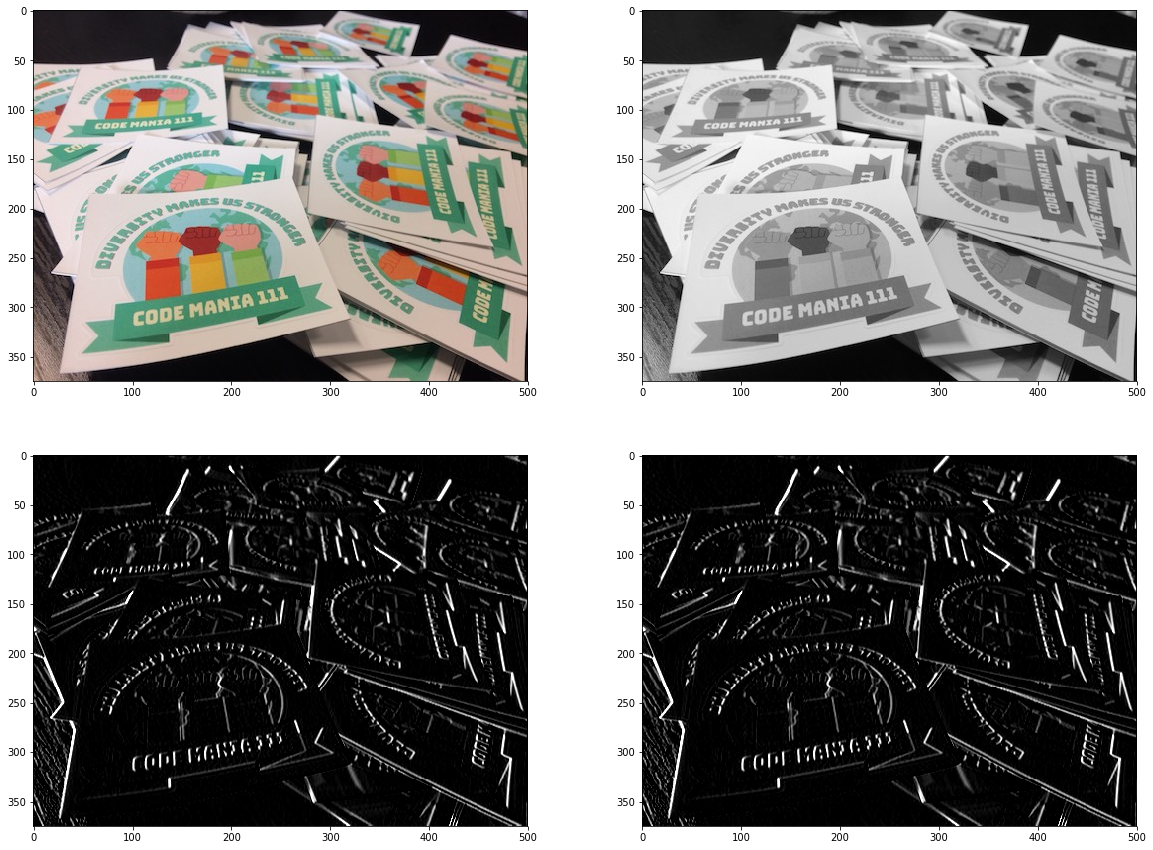

In [4]:
image = cv2.imread('codemania-stickers.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = np.array(
    (
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ),
    dtype='int'
)

K = sobel_x
convolve_output = convolve(gray, K)
# When ddepth=-1, the output image will have the same depth as the source.
opencv_output = cv2.filter2D(gray, -1, K)

# Use this code below when run Python code from command line
# cv2.imshow('Original', gray)
# cv2.imshow('sobel_x - convolve', convolve_output)
# cv2.imshow('sobel_x - opencv', opencv_output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# In Jupyter notebook, we need to use Matplotlib to show an image
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(opencv_output, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(convolve_output, cmap='gray');